In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np 
import pandas as pd
import seaborn as sns
import pickle
import Ressources.TransformHelper as TransformHelper

In [2]:
def save_to_disk(data, filepath):
    with open(filepath, 'wb') as file:
        pickle.dump(data, file)
def load_from_disk(filepath):
    with open(filepath, 'rb') as file:
        data = pickle.load(file)
        return data

### Load image data

In [3]:
# load images
white_bg_img = cv2.imread("./ressources/map_white.png")
ref_points_img = cv2.imread("./ressources/map_references.png")
ref_points_img = cv2.cvtColor(ref_points_img, cv2.COLOR_BGR2RGB)

White Background shape: (4096, 4096, 3)
Ref points resized img shape: (4096, 4096, 3)


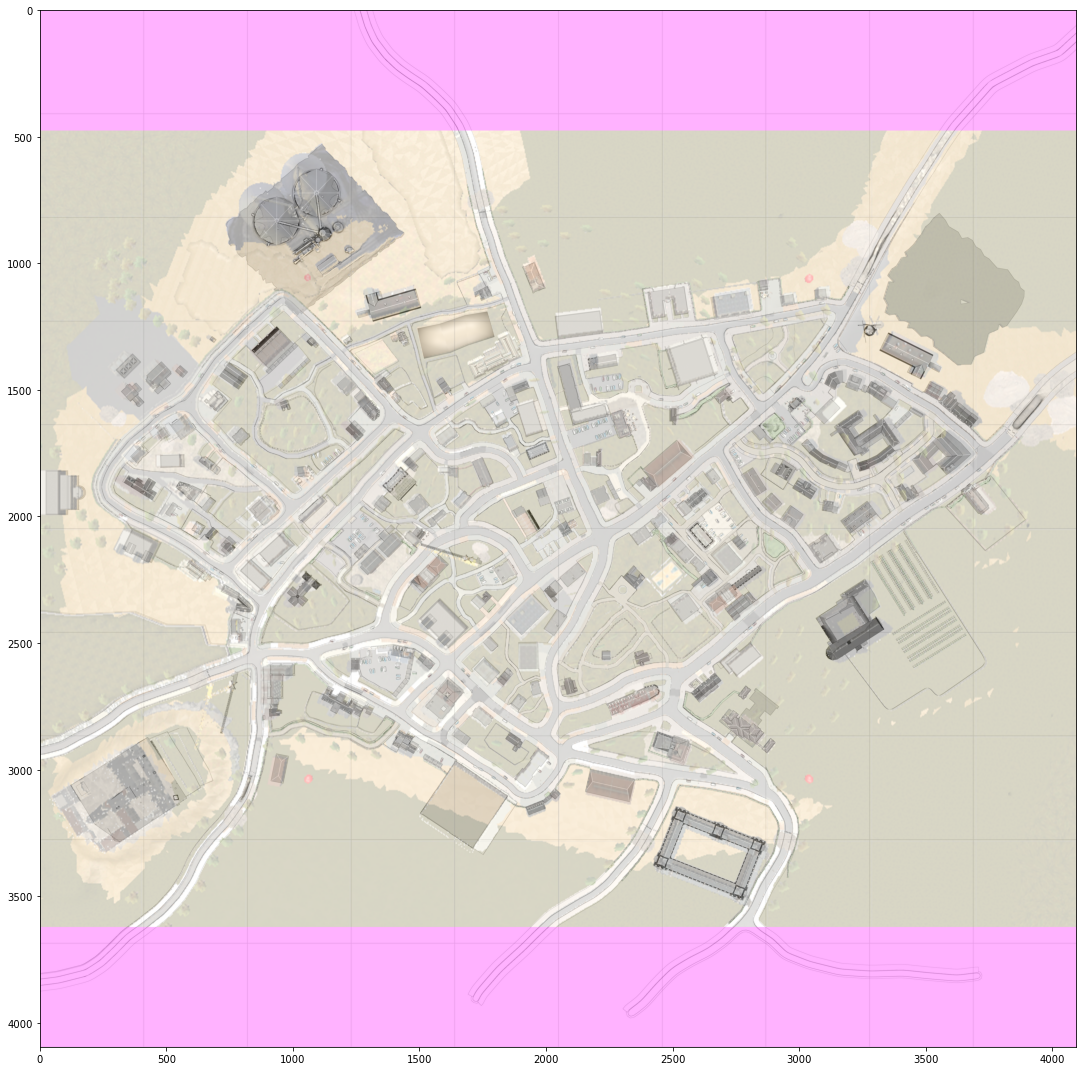

In [4]:
# check sizes of images
print("White Background shape: " + str(np.shape(white_bg_img)))
print("Ref points resized img shape: " + str(np.shape(ref_points_img)))

# check overlay image
overlaied_img = cv2.addWeighted(white_bg_img,0.7,ref_points_img,0.3,0)
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(overlaied_img)
plt.tight_layout()


### Perspective Transform

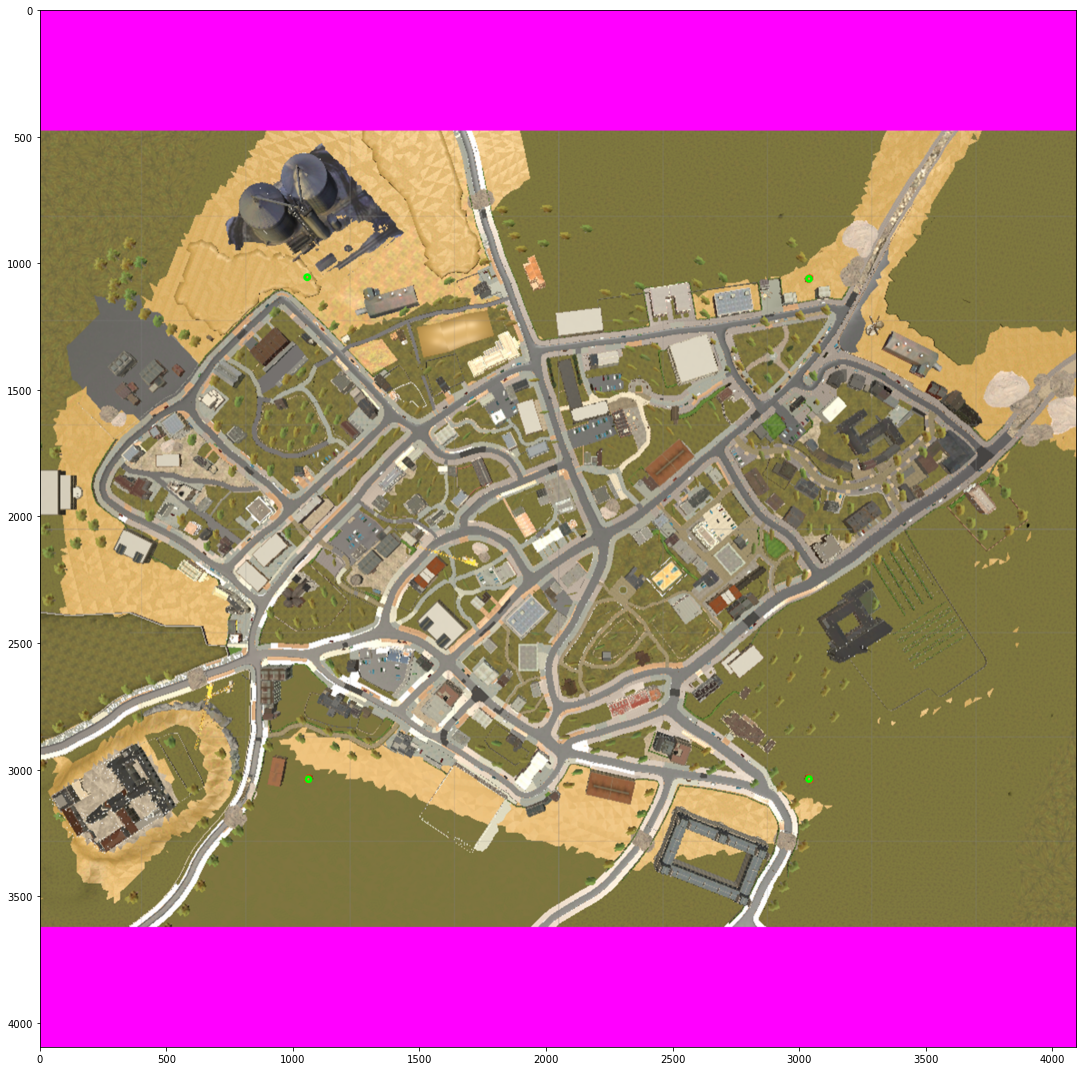

In [5]:
# find ref point coordinates 
ref_points_added = ref_points_img.copy()
cv2.circle(ref_points_added, (1055,1055), 10, (0,300,0), 10) # top left
cv2.circle(ref_points_added, (3037,1061), 10, (0,300,0), 10) # top right
cv2.circle(ref_points_added, (1060,3038), 10, (0,300,0), 10) # bottom left
cv2.circle(ref_points_added, (3037,3037), 10, (0,300,0), 10) # bottom right

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(ref_points_added)
plt.tight_layout()

In [13]:
# Compute transform matrix 
input_pts = np.float32([[240,-240], [-240,-240], [-240,240],[240,240]]) # bottom right, bottom left, top left, top right
target_pts = np.float32([[3037,3037], [1060,3038], [1055,1055], [3037,1061]]) # bottom right, bottom left, top left, top right
transform_matrix = cv2.getPerspectiveTransform(input_pts,target_pts)

transform_infos = {}
transform_infos["perspective_transform_matrix"] = transform_matrix
transform_infos["image_size"] = white_bg_img.shape[0:2]
transform_infos["input_points"] = input_pts
transform_infos["target_points"] = target_pts
save_to_disk(transform_infos,"./Ressources/map_image_transform_infos.pickle")

### Load measurement data

In [7]:
# Read example file 
example_df = pd.read_csv("./Results/1023_CompleteExploration_Hitpoints.csv")
#example_df[:10]

In [8]:
# Apply pixel transformation for collider centers & hit points  
example_df = TransformHelper.apply_perspective_transform_matrix(transform_matrix,img_size=(4096,4096),dataframe=example_df,df_x_name="hitObjectColliderBoundsCenter.x",df_y_name="hitObjectColliderBoundsCenter.z",transform_x_name="transformed_collidercenter_x",transform_y_name="transformed_collidercenter_y")
example_df = TransformHelper.apply_perspective_transform_matrix(transform_matrix,img_size=(4096,4096),dataframe=example_df,df_x_name="hitPointOnObject.x",df_y_name="hitPointOnObject.z",transform_x_name="transformed_hitpoint_x",transform_y_name="transformed_hitpoint_y")

example_df[:10]

100%|██████████| 377285/377285 [00:39<00:00, 9524.89it/s] 


Unnamed: 0  timeStampDataPointStart  timeStampDataPointEnd  \
0           0             1.619691e+09           1.619691e+09   
1           1             1.619691e+09           1.619691e+09   
2           0             1.619691e+09           1.619691e+09   
3           1             1.619691e+09           1.619691e+09   
4           0             1.619691e+09           1.619691e+09   
5           1             1.619691e+09           1.619691e+09   
6           0             1.619691e+09           1.619691e+09   
7           0             1.619691e+09           1.619691e+09   
8           0             1.619691e+09           1.619691e+09   
9           1             1.619691e+09           1.619691e+09   

   hitObjectColliderName  ordinalOfHit  hitPointOnObject.x  \
0         pavement_O.002             1          -64.191063   
1          terrain_S.001             2          -65.567734   
2         pavement_O.002             1          -64.191063   
3          terrain_S.001             2          -65.567734   
4         pavement_O.002             1          -64.027878   
5  road_base_network.004             2          -65.057053   
6          terrain_S.001             1          -65.711441   
7          terrain_S.001             1          -66.227020   
8         pavement_O.002             1          -63.692066   
9  road_base_network.004             2          -64.704819   

   hitPointOnObject.y  hitPointOnObject.z  hitObjectColliderBoundsCenter.x  \
0            1.429070           71.214470                      -165.163147   
1            1.163447           81.047607                       -60.390293   
2            1.429070           71.214470                      -165.163147   
3            1.163447           81.047607                       -60.390293   
4            1.426832           70.591492                      -165.163147   
5            1.221172           78.057304                        39.257874   
6            1.185995           83.164772                       -60.390293   
7            1.206157           87.327980                       -60.390293   
8            1.419669           68.122917                      -165.163147   
9            1.200827           75.465088                        39.257874   

   hitObjectColliderBoundsCenter.y  hitObjectColliderBoundsCenter.z  \
0                         1.451688                       -15.555870   
1                         1.153675                       100.804741   
2                         1.451688                       -15.555870   
3                         1.153675                       100.804741   
4                         1.451688                       -15.555870   
5                        -4.408301                        51.768860   
6                         1.153675                       100.804741   
7                         1.153675                       100.804741   
8                         1.451688                       -15.555870   
9                        -4.408301                        51.768860   

   transformed_collidercenter_x  transformed_collidercenter_y  \
0                   1367.184847                   1983.633874   
1                   1799.187626                   2463.431630   
2                   1367.184847                   1983.633874   
3                   1799.187626                   2463.431630   
4                   1367.184847                   1983.633874   
5                   2210.625643                   2260.284238   
6                   1799.187626                   2463.431630   
7                   1799.187626                   2463.431630   
8                   1367.184847                   1983.633874   
9                   2210.625643                   2260.284238   

   transformed_hitpoint_x  transformed_hitpoint_y  
0             1783.685774             2341.266386  
1             1777.935818             2381.879862  
2             1783.685774             2341.266386  
3             1777.935818             2

<AxesSubplot:xlabel='transformed_hitpoint_x', ylabel='Count'>

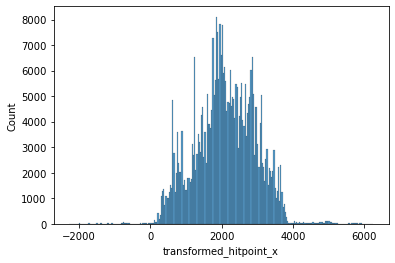

In [9]:

sns.histplot(example_df["transformed_hitpoint_x"])

In [10]:
only_first_ordinal = example_df.loc[example_df["ordinalOfHit"] == 1]
only_first_ordinal[:10]

Unnamed: 0  timeStampDataPointStart  timeStampDataPointEnd  \
0            0             1.619691e+09           1.619691e+09   
2            0             1.619691e+09           1.619691e+09   
4            0             1.619691e+09           1.619691e+09   
6            0             1.619691e+09           1.619691e+09   
7            0             1.619691e+09           1.619691e+09   
8            0             1.619691e+09           1.619691e+09   
10           0             1.619691e+09           1.619691e+09   
12           0             1.619691e+09           1.619691e+09   
14           0             1.619691e+09           1.619691e+09   
16           0             1.619691e+09           1.619691e+09   

   hitObjectColliderName  ordinalOfHit  hitPointOnObject.x  \
0         pavement_O.002             1          -64.191063   
2         pavement_O.002             1          -64.191063   
4         pavement_O.002             1          -64.027878   
6          terrain_S.001             1          -65.711441   
7          terrain_S.001             1          -66.227020   
8         pavement_O.002             1          -63.692066   
10        pavement_O.002             1          -63.761074   
12        pavement_O.002             1          -63.761074   
14          Building_160             1          -72.201660   
16          Building_160             1          -72.201660   

    hitPointOnObject.y  hitPointOnObject.z  hitObjectColliderBoundsCenter.x  \
0             1.429070           71.214470                      -165.163147   
2             1.429070           71.214470                      -165.163147   
4             1.426832           70.591492                      -165.163147   
6             1.185995           83.164772                       -60.390293   
7             1.206157           87.327980                       -60.390293   
8             1.419669           68.122917                      -165.163147   
10            1.422320           69.136017                      -165.163147   
12            1.422320           69.136017                      -165.163147   
14            2.897408          116.358757                       -68.428040   
16            2.897408          116.358757                       -68.428040   

    hitObjectColliderBoundsCenter.y  hitObjectColliderBoundsCenter.z  \
0                          1.451688                       -15.555870   
2                          1.451688                       -15.555870   
4                          1.451688                       -15.555870   
6                          1.153675                       100.804741   
7                          1.153675                       100.804741   
8                          1.451688                       -15.555870   
10                         1.451688                       -15.555870   
12                         1.451688                       -15.555870   
14                         4.519094                       122.944267   
16                         4.519094                       122.944267   

    transformed_collidercenter_x  transformed_collidercenter_y  \
0                    1367.184847                   1983.633874   
2                    1367.184847                   1983.633874   
4                    1367.184847                   1983.633874   
6                    1799.187626                   2463.431630   
7                    1799.187626                   2463.431630   
8                    1367.184847                   1983.633874   
10                   1367.184847                   1983.633874   
12                   1367.184847                   1983.633874   
14                   1765.843387                   2554.953670   
16                   1765.843387                   2554.953670   

    transformed_hitpoint_x  transformed_hitpoint_y  
0              1783.685774             2341.266386  
2              1783.685774             2341.266386  
4              1784.363730             2338.6

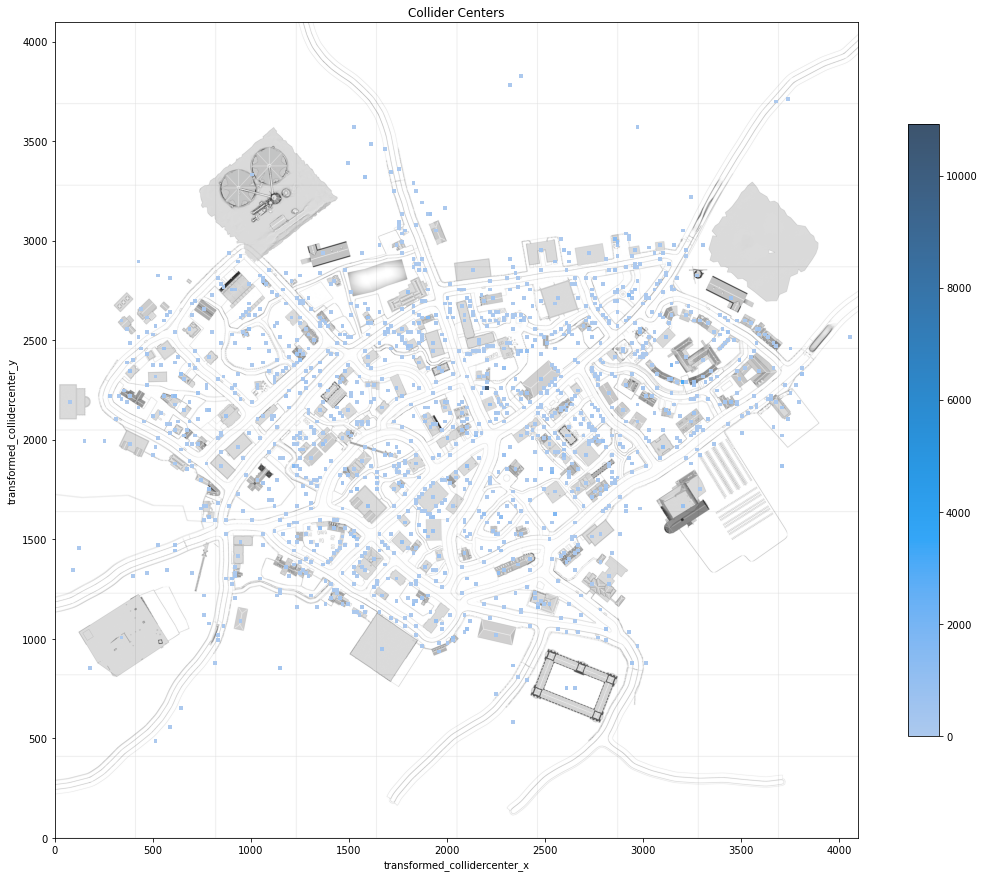

In [11]:
# Hit collider centers

fig, ax = plt.subplots(figsize=(18, 15))

map_bins = 400
histplot = sns.histplot(only_first_ordinal,x="transformed_collidercenter_x",y="transformed_collidercenter_y",bins=map_bins,discrete=(False,False),log_scale=(False,False), cbar=True, cbar_kws=dict(shrink=0.75), zorder=2, ax=ax) #alpha = 1,

# plot your KDE
#ax.set_frame_on(False)
plt.xlim(0, 4096)
plt.ylim(0, 4096)
plt.title("Collider Centers")
#plt.axis('off')
#plt.show()

# update
histplot.imshow(white_bg_img,
         aspect=ax.get_aspect(),
         extent= ax.get_xlim() + ax.get_ylim(),
         zorder=1)

plt.show() # add



/Users/stefan/opt/anaconda3/envs/graphs/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


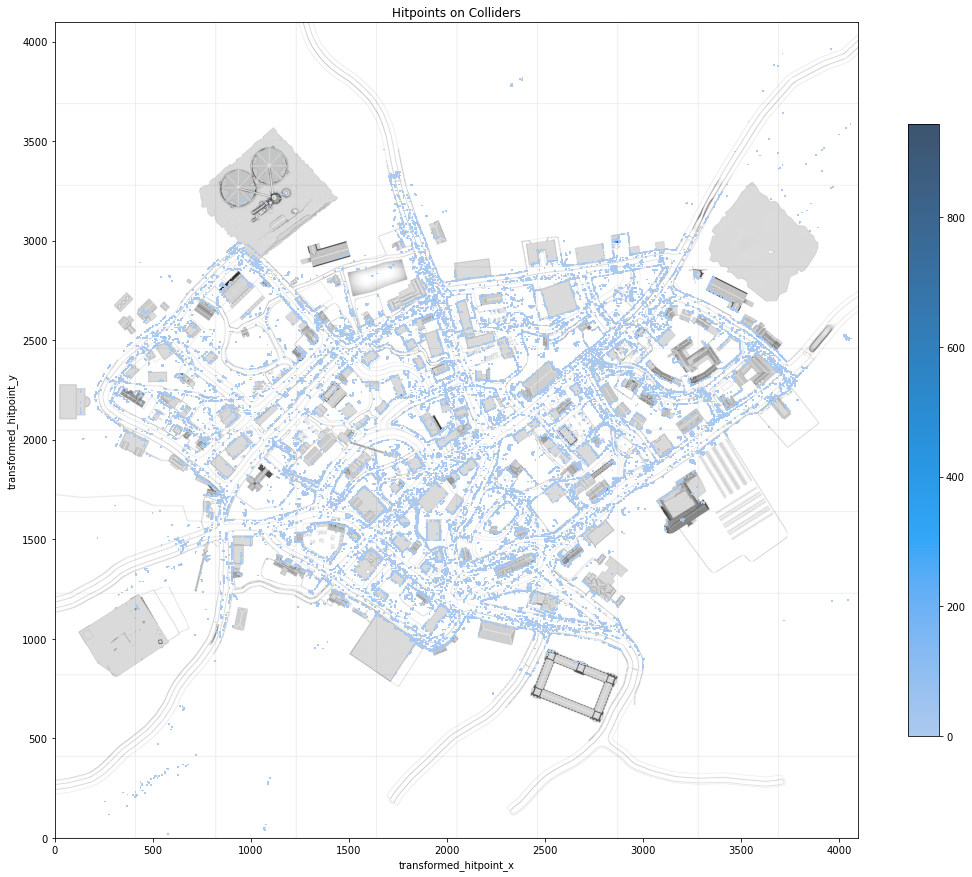

In [12]:
# Hit points on colliders

fig, ax = plt.subplots(figsize=(18, 15))

map_bins = 2048
histplot = sns.histplot(only_first_ordinal,x="transformed_hitpoint_x",y="transformed_hitpoint_y",bins=map_bins,discrete=(False,False),log_scale=(False,False), cbar=True, cbar_kws=dict(shrink=0.75), alpha = 1, zorder=2, ax=ax)

# plot your KDE
#ax.set_frame_on(False)
plt.xlim(0, 4096)
plt.ylim(0, 4096)
plt.title("Hitpoints on Colliders")
#plt.axis('off')
#plt.show()

# update
histplot.imshow(white_bg_img,
         aspect=ax.get_aspect(),
         extent= ax.get_xlim() + ax.get_ylim(),
         zorder=1)

plt.show() # add



### Trying out

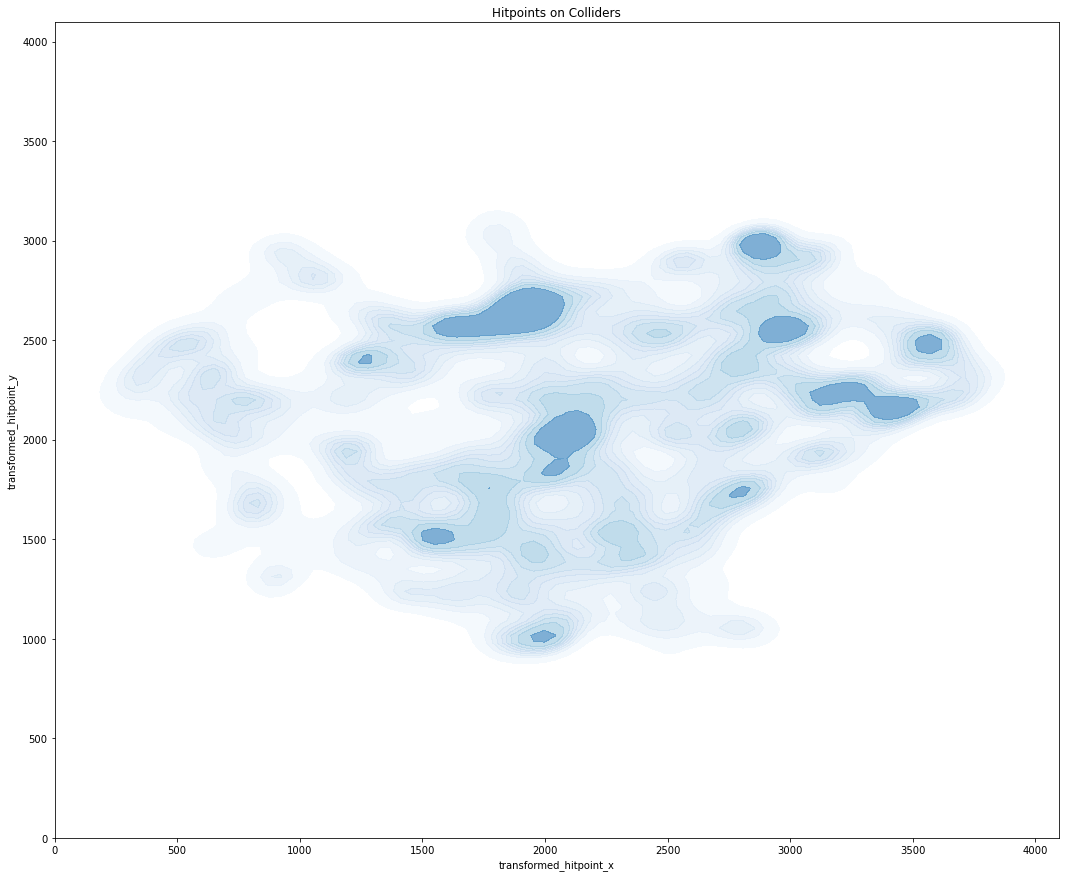

In [49]:

fig, ax = plt.subplots(figsize=(18, 15))

map_bins = 2048
kdeplot = sns.kdeplot(data=only_first_ordinal,x="transformed_hitpoint_x",y="transformed_hitpoint_y", bw= 0.1, cmap="Blues", shade=True, shade_lowest=False, alpha = 0.6, zorder=2, ax=ax)


# plot your KDE
#ax.set_frame_on(False)
plt.xlim(0, 4096)
plt.ylim(0, 4096)
plt.title("Hitpoints on Colliders")
#plt.axis('off')
#plt.show()

# update
histplot.imshow(white_bg_img,
         aspect=ax.get_aspect(),
         extent= ax.get_xlim() + ax.get_ylim(),
         zorder=1)

plt.show() # add





In [67]:
# sns.heatmap(...)
# np.histogram2d(...)